# Strategy 2 🧬 :

### Overview
In this strategy, we employ a two-phase approach to analyzing genomic data using ggcaller. The goal is to predict gene presence or absence in MAGs by leveraging insights from a subset of the dataset.

### Methodology

1. **Initial Data Processing**:
   - **Dataset Splitting**: The entire dataset is divided into two distinct parts:
     - **25% of the dataset** is runned on ggcaller.
     - **75% of the dataset** is used to simulate MAGs.
   - This division ensures that we have a robust reference from the actual data and a larger simulated dataset for broader testing and model application.

2. **Matrix Generation**:
   - **Reference Matrix**: Created from the 25% of the dataset processed by ggcaller. This matrix serves as the basis for training our predictive model.
   - **Queried Matrix**: Generated from the simulated MAGs that constitute the remaining 75% of the dataset. This matrix is used to test the model's predictive capabilities.

### Objectives

- **Model Training**: The reference matrix is used to train a machine learning model. This model learns patterns of gene presence or absence.
- **Prediction Application**: The trained model is then applied to the queried matrix (from the simulated MAGs). The aim is to predict gene presence or absence across this larger set of data.



In [174]:

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [175]:
# Load n transpose the data
reference_matrix = pd.read_csv('Ref_Run1.csv', index_col=0).T
simulated_MAGs_matrix = pd.read_csv('Mags_Run1.csv', index_col=0).T


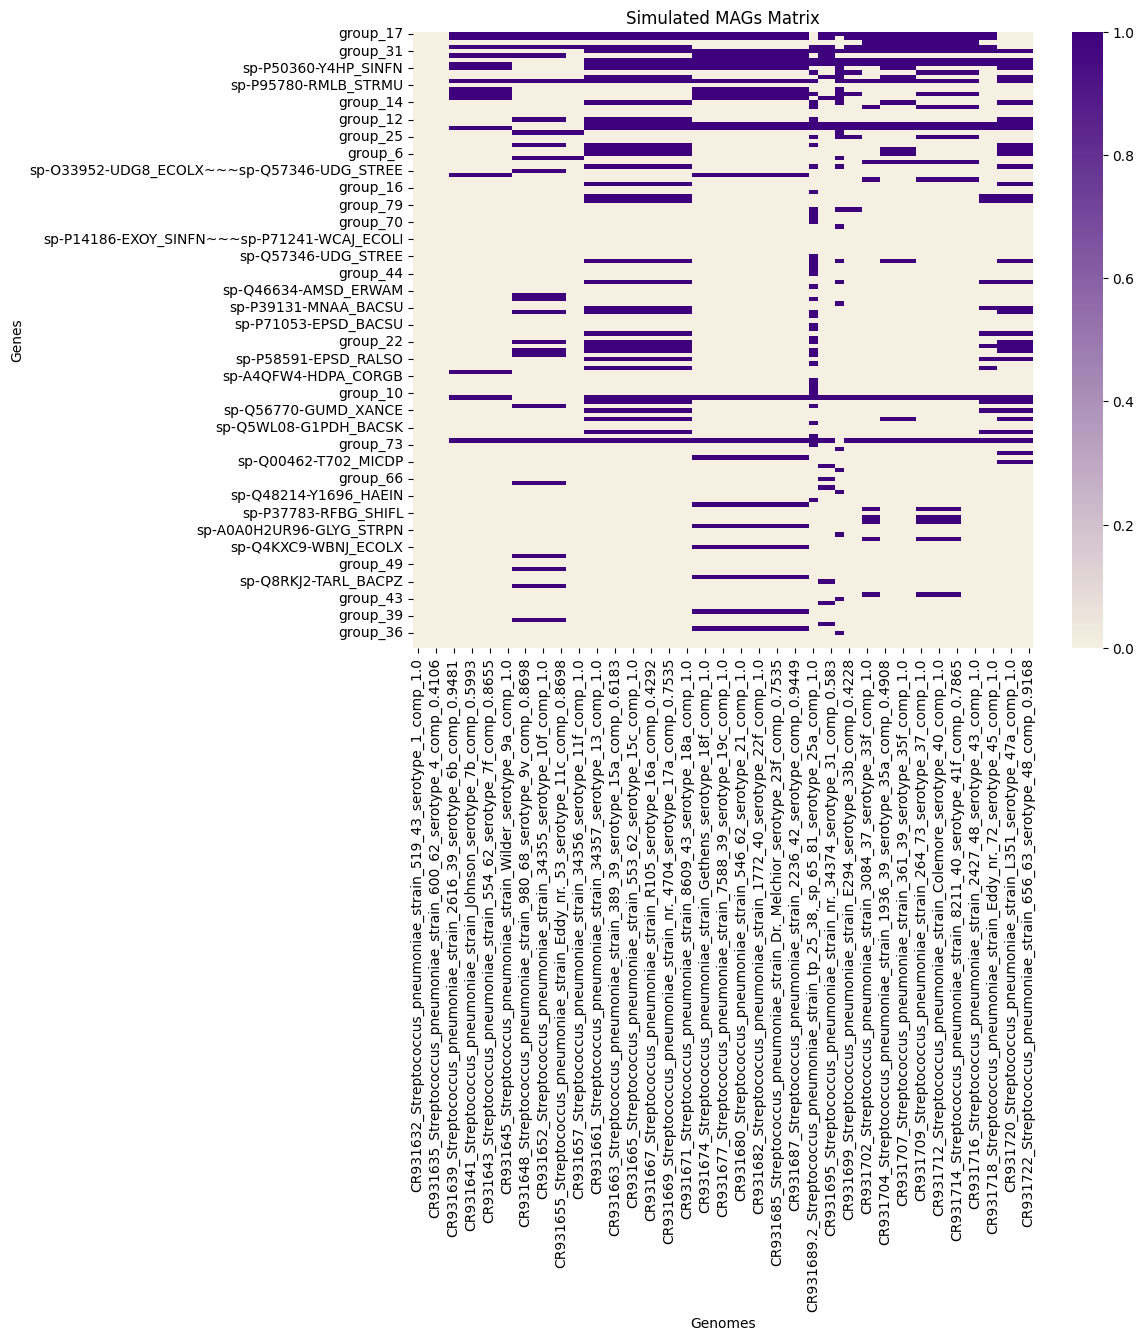

In [176]:
 
df = pd.read_csv('Mags_Run1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]  
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap=cmap)
plt.title('Simulated MAGs Matrix')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()


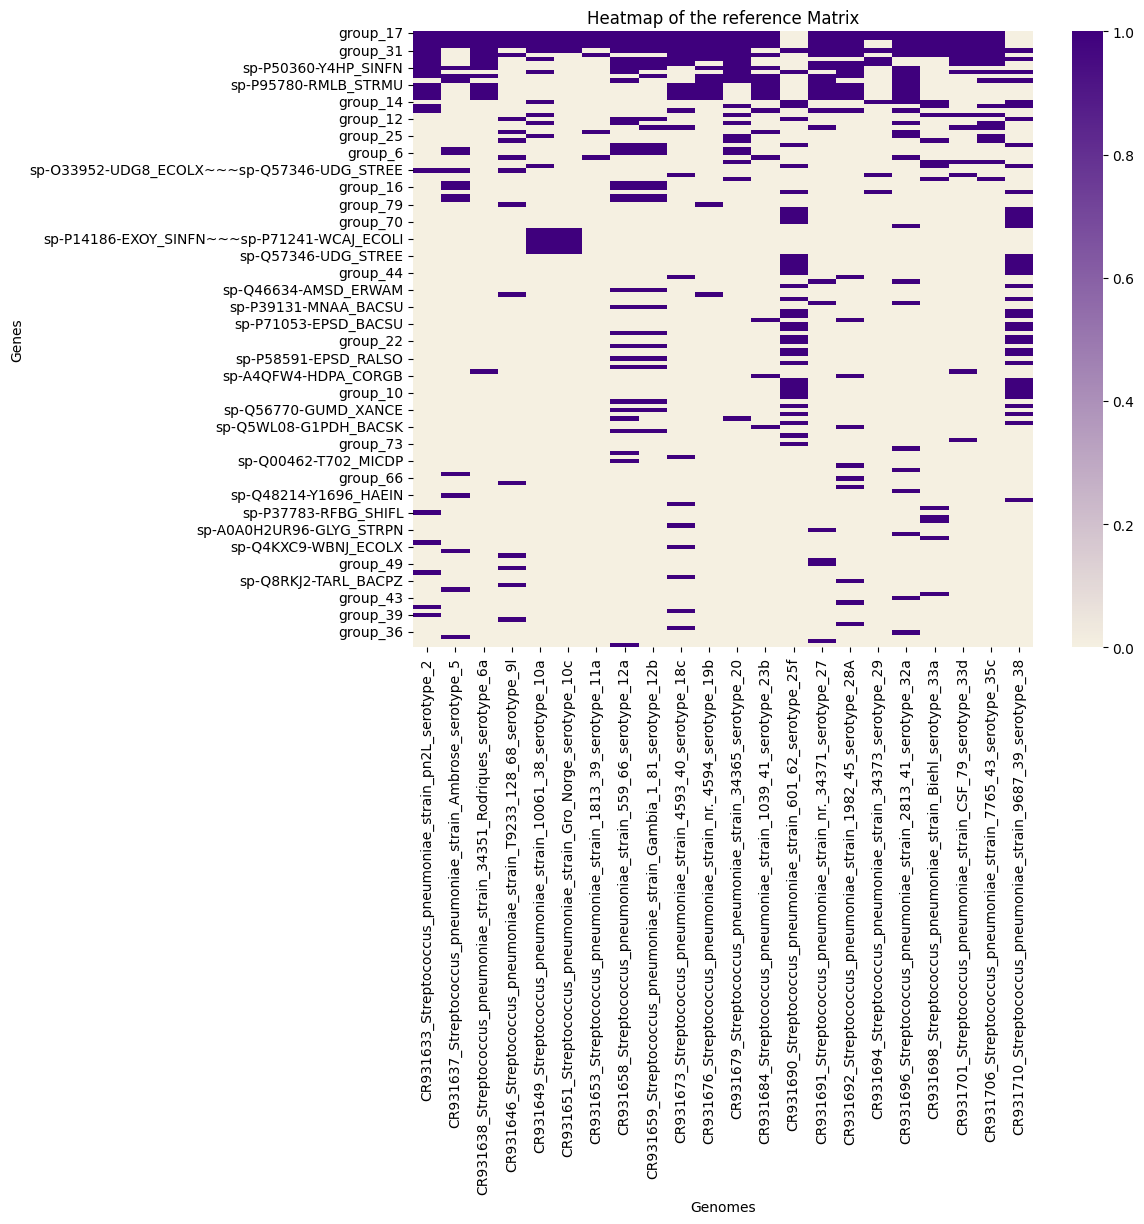

In [177]:
df2 = pd.read_csv('Ref_Run1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.figure(figsize=(10, 8)) 
sns.heatmap(df2, cmap=cmap)
plt.title('Heatmap of the reference Matrix')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()


In [178]:
# Initialize DataFrame to store imputed matrices later
imputed_MAGs_matrix = pd.DataFrame()

imputed_MAGs_matrix2 = pd.DataFrame()

imputed_MAGs_matrix3 = pd.DataFrame()

imputed_MAGs_matrix4 = pd.DataFrame()


imputed_MAGs_matrix5 = pd.DataFrame()


imputed_MAGs_matrix6 = pd.DataFrame()


In [179]:
# Replace zeros with NaN
mask = simulated_MAGs_matrix == 0
simulated_MAGs_matrix[mask] = np.nan



## Simple Imputer ## 

The `SimpleImputer` class from `scikit-learn` offers a straightforward yet powerful way to handle missing entries based on the observed frequency of data.

### Strategy Explained

`SimpleImputer` replaces missing values using the most frequent value in each column. This strategy is particularly effective in our datasets where:

- Each column represents a gene.
- Each row corresponds to a genome.
- Entries indicate the presence (1), absence (0), or missing status (NaN) of genes in genomes.

### Example

Consider a scenario where you have multiple genomes with data on whether specific genes are present or absent, but some data points are missing:

- **Gene C Analysis**:
  - If Gene C is observed in Genome 1 and Genome 2 as present, and these are the only non-missing entries, `SimpleImputer` will impute the presence of Gene C for any genome where it's missing.
  - This method assumes that the presence or absence of a gene that frequently occurs across many genomes can be a reasonable prediction for missing values.


In [180]:
 

for index, row in simulated_MAGs_matrix.iterrows():
    temporary_matrix = pd.concat([reference_matrix, row.to_frame().T])
    #print("Before Simple Imputation")
    #print(temporary_matrix)
    #print(row)
    for column in temporary_matrix.columns:
        #print(column)
        if temporary_matrix[column].isnull().any():
            #most_frequent_value = reference_matrix[column].mode()[0]
            #print(most_frequent_value)
            #imputer = SimpleImputer(strategy='constant', fill_value=most_frequent_value)
            imputer_1 = SimpleImputer(strategy='most_frequent')
            temporary_matrix[column] = imputer_1.fit_transform(temporary_matrix[[column]]).ravel()
    #print("After Imputation")
    #print(temporary_matrix)
    mag_name = index
    imputed_MAGs_matrix = pd.concat([imputed_MAGs_matrix, temporary_matrix.loc[[mag_name]]])
#print("Imputed MAGs Matrix Simple Imputation:")
imputed_MAGs_matrix = imputed_MAGs_matrix.astype(int)
#print(imputed_MAGs_matrix)



In [181]:

imputed_MAGs_matrix = imputed_MAGs_matrix.T
imputed_MAGs_matrix.to_csv('SimpleImputer_Imatrix.csv', index=True)


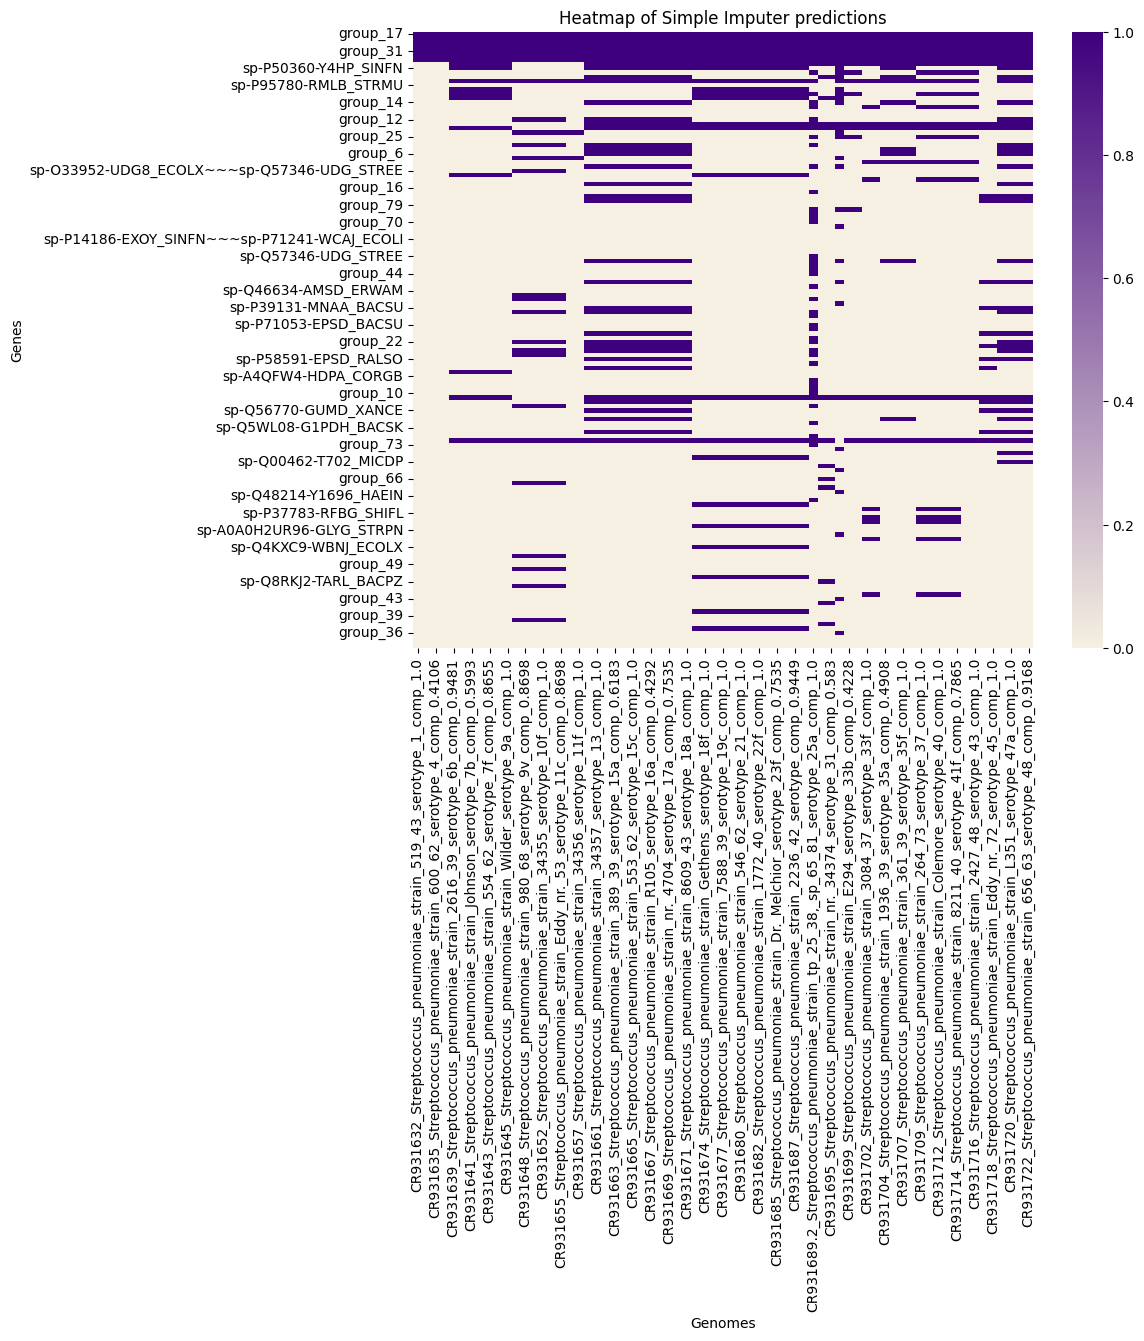

In [182]:
SI = pd.read_csv('SimpleImputer_Imatrix.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))  


sns.heatmap(SI, cmap=cmap )
plt.title('Heatmap of Simple Imputer predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()

 ## MultiVariate Imputation✨ ## 

## BayesianRidge estimator(Default) ##

Bayesian Ridge: In the context of imputing a gene presence/absence matrix, it treat the problem as a regression task where the presence or absence of genes (1 or 0) are predicted based on the patterns of other genes in the matrix. 


In [183]:
def custom_round(x):  
    return np.where(x >= 0.5, 1, 0)
for index, row in simulated_MAGs_matrix.iterrows():
    temporary_matrix2 = pd.concat([reference_matrix, row.to_frame().T])
    #print("Before BayesianRidge Imputation")
    #print(temporary_matrix2)
    #print(row)
    for column in temporary_matrix2.columns:
        #print(column)
        if temporary_matrix2[column].isnull().any():
            imputer_2 = IterativeImputer(estimator=BayesianRidge())
            temporary_matrix2[column] = imputer_2.fit_transform(temporary_matrix2[[column]])
    #temporary_matrix2 = temporary_matrix2.round()
    temporary_matrix2 = temporary_matrix2.apply(custom_round)
    #print("After Imputation")
    #print(temporary_matrix2)
    mag_name = index
    imputed_MAGs_matrix2 = pd.concat([imputed_MAGs_matrix2, temporary_matrix2.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #BayesianRidge estimator(Default)#:")
imputed_MAGs_matrix2 = imputed_MAGs_matrix2.astype(int)
#print(imputed_MAGs_matrix2)

In [184]:
imputed_MAGs_matrix2 = imputed_MAGs_matrix2.T
imputed_MAGs_matrix2.to_csv('BayesianRidge_Imatrix_1.csv', index=True)


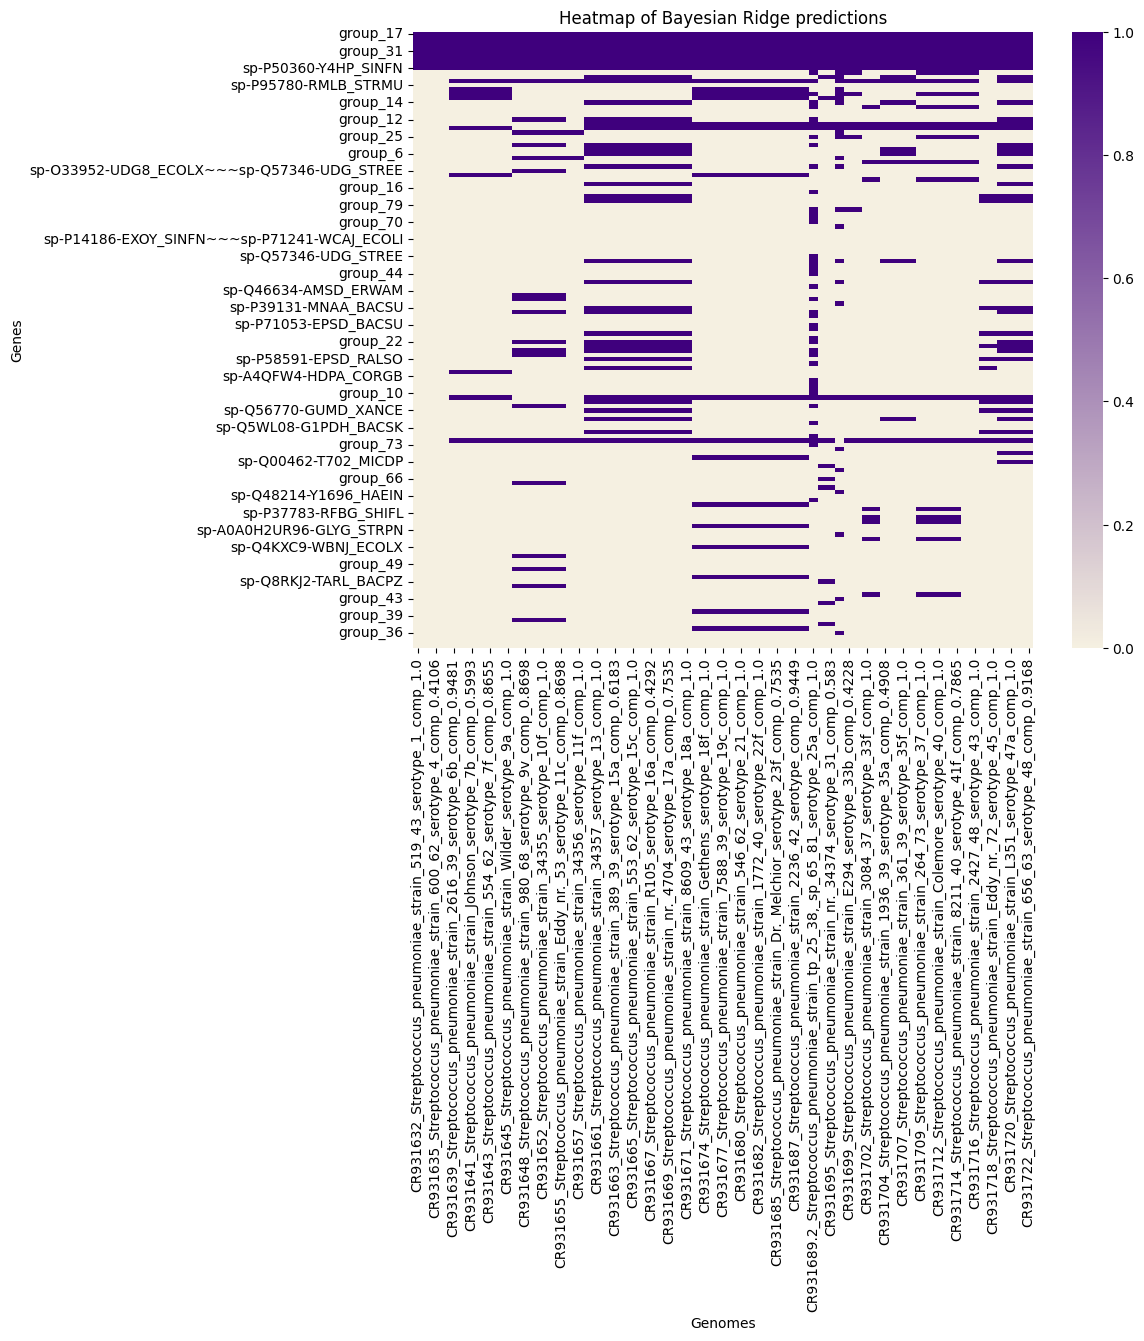

In [185]:
BR = pd.read_csv('BayesianRidge_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))  

 
sns.heatmap(BR, cmap=cmap )
 
plt.title('Heatmap of Bayesian Ridge predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()

## DecisionTreeRegressor ##

A Decision Tree Regressor creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. For imputing gene presence, it create rules that decide if a gene is present based on the presence of other genes in the genome.

In [186]:
for index, row in simulated_MAGs_matrix.iterrows(): ###Ignore
    temporary_matrix3 = pd.concat([reference_matrix, row.to_frame().T])
   # print("Before DecisionTreeRegressor Imputation")
    #print(temporary_matrix3)
    #print(row)
    for column in temporary_matrix3.columns:
        #print(column)
        if temporary_matrix3[column].isnull().any():
            imputer_3 = IterativeImputer(estimator = DecisionTreeRegressor(max_features='sqrt', random_state=0))
            temporary_matrix3[column] = imputer_3.fit_transform(temporary_matrix3[[column]]).ravel()
    temporary_matrix3 = temporary_matrix3.round() #so the value wil be rounded to 0 or 1. gotta check the biological meaning of it ?
  #  
    #print("After Imputation")
   # 
    #print(temporary_matrix3)
    mag_name = index
    imputed_MAGs_matrix3 = pd.concat([imputed_MAGs_matrix3, temporary_matrix3.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #DecisionTreeRegressor#:")
imputed_MAGs_matrix3 = imputed_MAGs_matrix3.astype(int)
#print(imputed_MAGs_matrix3)
 

In [187]:
imputed_MAGs_matrix3 = imputed_MAGs_matrix3.T
imputed_MAGs_matrix3.to_csv('DTR_Imatrix_1.csv', index=True)

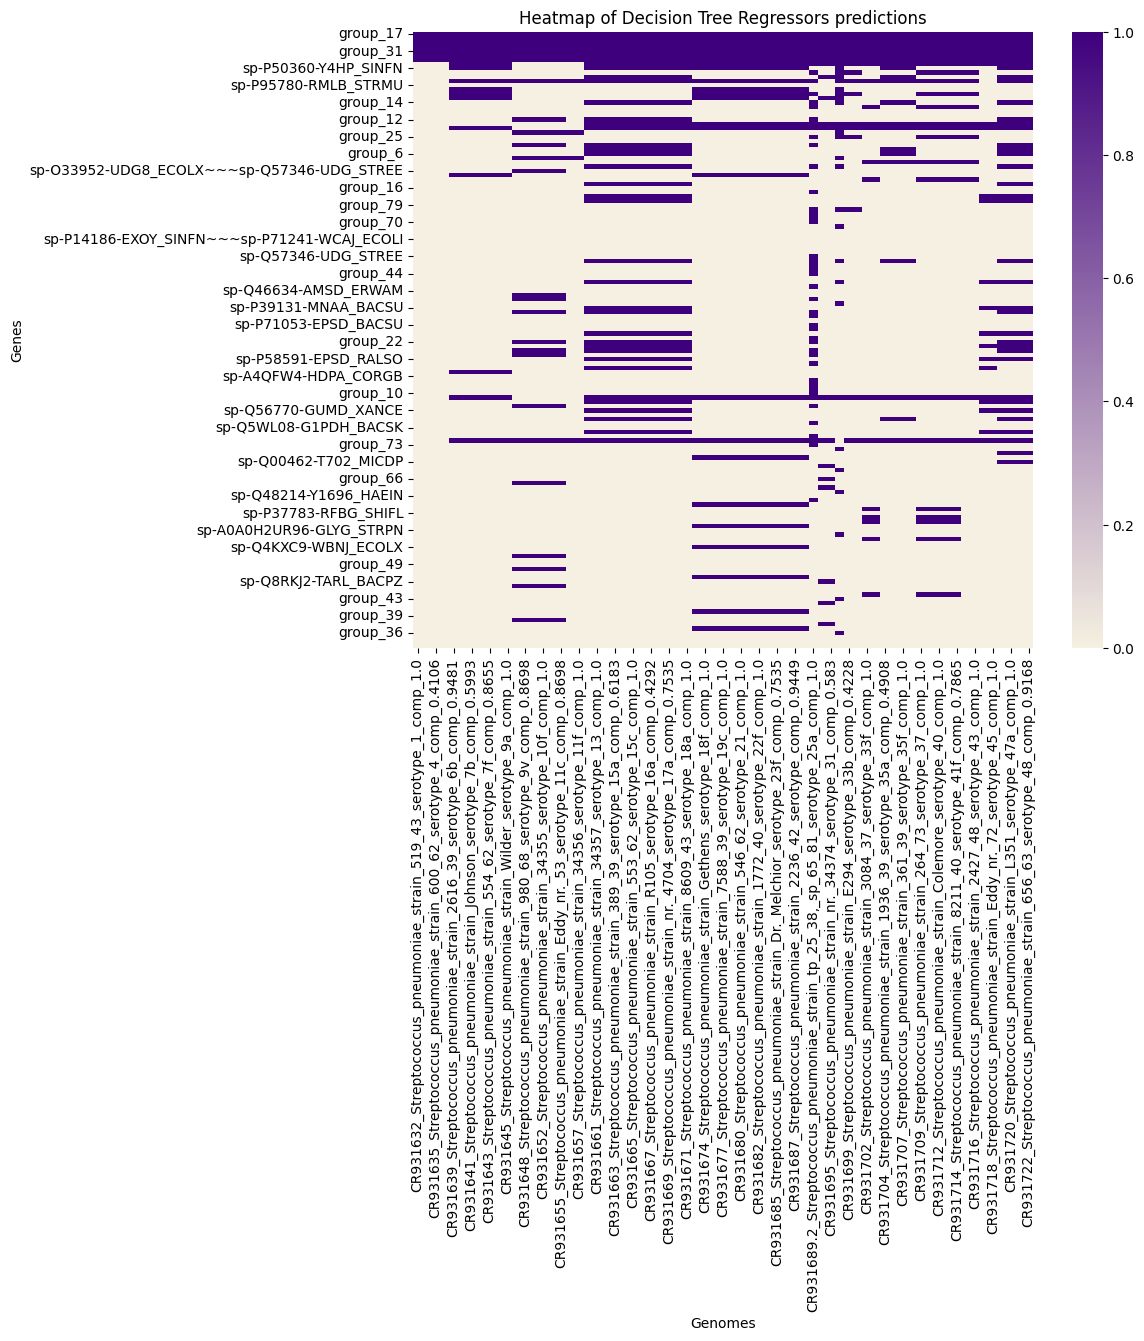

In [188]:
DTR = pd.read_csv('DTR_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))  

 
sns.heatmap(DTR, cmap=cmap)
 
plt.title('Heatmap of Decision Tree Regressors predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()

## ExtraTreesRegressor ##

Predict gene presence based on random combinations of other genes, averaging the results across many trees.

In [189]:
for index, row in simulated_MAGs_matrix.iterrows(): #ignore
    temporary_matrix4 = pd.concat([reference_matrix, row.to_frame().T])
    #print("Before ExtraTreesRegressor Imputation")
   # print(temporary_matrix4)
    #print(row)
    for column in temporary_matrix4.columns:
        #print(column)
        if temporary_matrix4[column].isnull().any():
            imputer_4 = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators=10, random_state=0))
            #imputer_4 = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=50, random_state=0, n_jobs=-1), max_iter=10, random_state=0)
            temporary_matrix4[column] = imputer_4.fit_transform(temporary_matrix4[[column]]).ravel()
    temporary_matrix4 = temporary_matrix4.round() #so the value wil be rounded to 0 or 1. gotta check the biological meaning of it ?
   # print("After Imputation")
    #print(temporary_matrix4)
    mag_name = index
    imputed_MAGs_matrix4 = pd.concat([imputed_MAGs_matrix4, temporary_matrix4.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #ExtraTreesRegressor#:")
imputed_MAGs_matrix4 = imputed_MAGs_matrix4.astype(int)
#print(imputed_MAGs_matrix4)

In [190]:
imputed_MAGs_matrix4 = imputed_MAGs_matrix4.T
imputed_MAGs_matrix4.to_csv('ETR_Imatrix_1.csv', index=True)

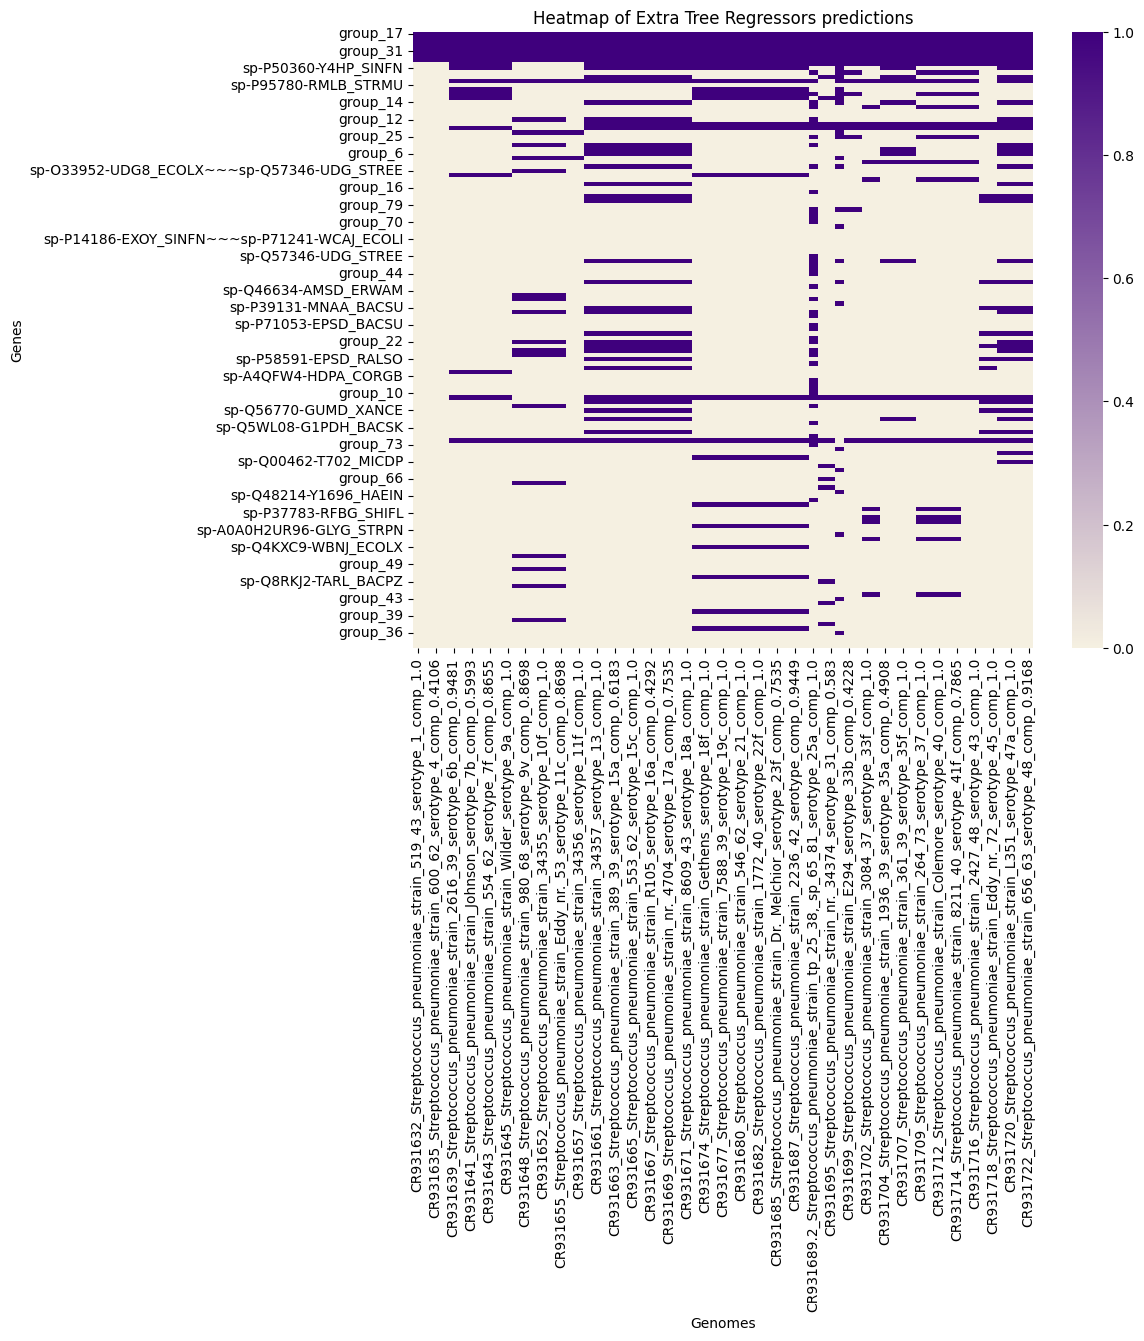

In [191]:
ETR = pd.read_csv('ETR_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))   
 
sns.heatmap(ETR, cmap=cmap)
 
plt.title('Heatmap of Extra Tree Regressors predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()

## KNeighborsRegressor ##

This method imputes missing data by averaging the values of the nearest neighbors found in the multidimensional space of available data. For gene presence/absence, it considers genomes as points in multidimensional space (with dimensions being gene presences), finds the closest genomes (those with the most similar gene presence patterns), and uses their values to predict the missing gene's status. 


In [192]:
for index, row in simulated_MAGs_matrix.iterrows(): 
    temporary_matrix5 = pd.concat([reference_matrix, row.to_frame().T])
  #  print("Before Imputation")
   # print(temporary_matrix5)
    #print(row)
    for column in temporary_matrix5.columns:
        #print(column)
        if temporary_matrix5[column].isnull().any():
            imputer_5 = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors=1))
            temporary_matrix5[column] = imputer_5.fit_transform(temporary_matrix5[[column]]).ravel()
    temporary_matrix5 = temporary_matrix5.round() #so the value wil be rounded to 0 or 1. gotta check the biological meaning of it ?
  #  print("After Imputation")
   # print(temporary_matrix5)
    mag_name = index
    imputed_MAGs_matrix5 = pd.concat([imputed_MAGs_matrix5, temporary_matrix5.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #KNeighborsRegressor#:")
imputed_MAGs_matrix5 = imputed_MAGs_matrix5.astype(int)
#print(imputed_MAGs_matrix5)

In [193]:
imputed_MAGs_matrix5 = imputed_MAGs_matrix5.T
imputed_MAGs_matrix5.to_csv('KNR_Imatrix_1.csv', index=True)

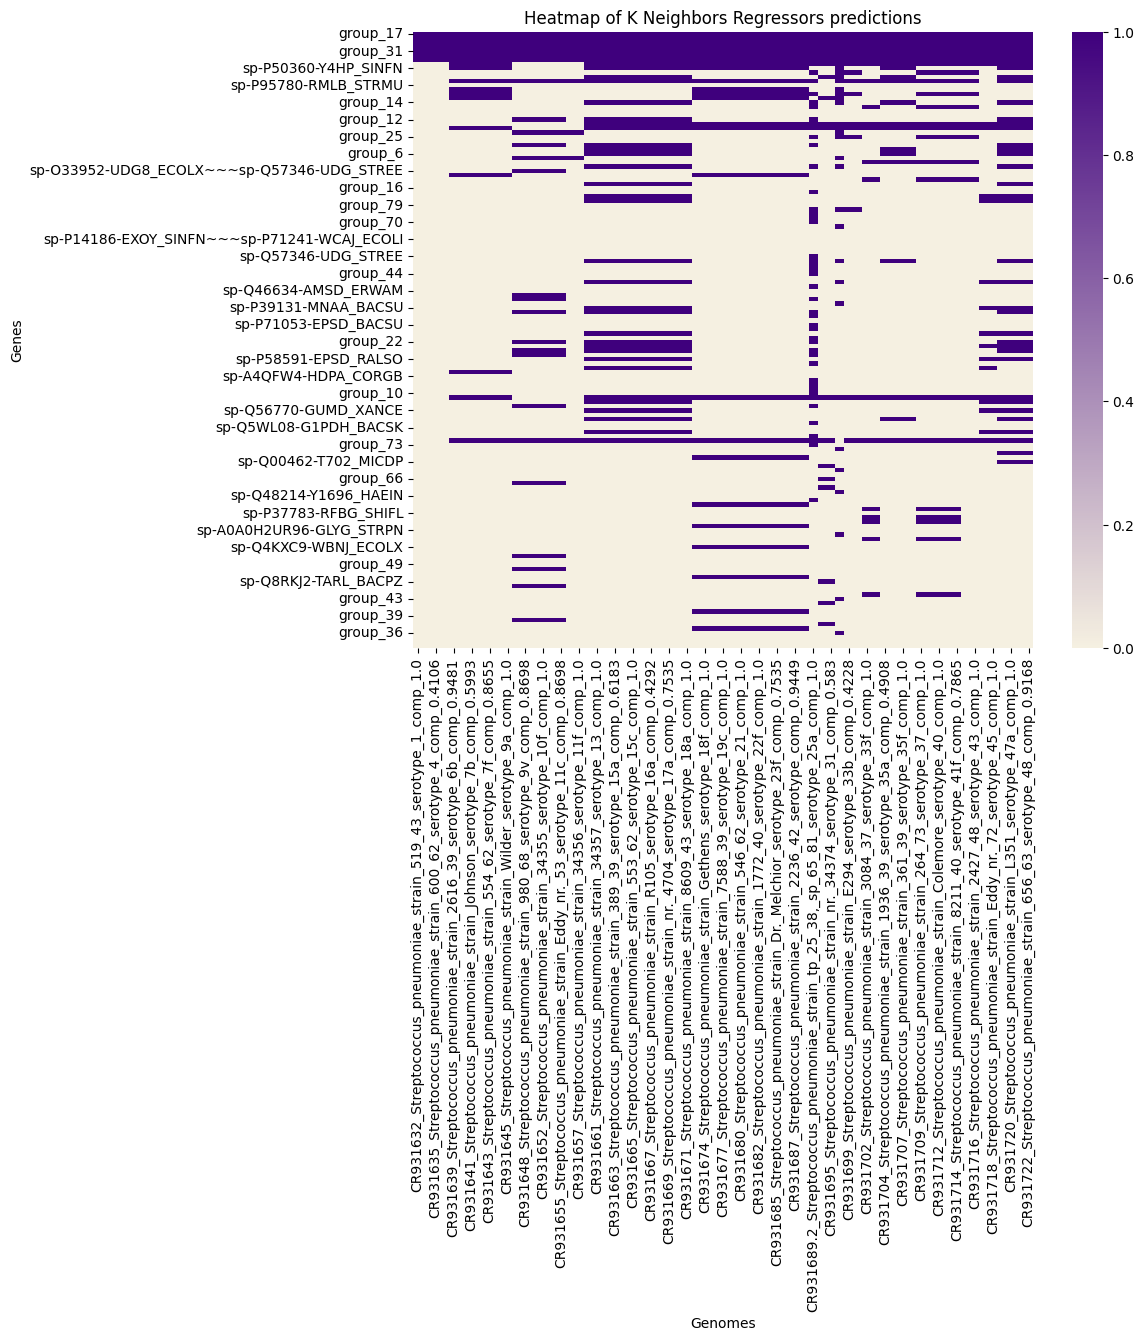

In [194]:
KNR = pd.read_csv('KNR_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))   
 
sns.heatmap(KNR, cmap=cmap)
 
plt.title('Heatmap of K Neighbors Regressors predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()

## KNNImputer ##

looks at the 'k' closest genome (in terms of gene presence/absence similarity) to the genome with missing data. 


In [195]:
for index, row in simulated_MAGs_matrix.iterrows():  
    temporary_matrix6 = pd.concat([reference_matrix, row.to_frame().T])
 
    for column in temporary_matrix6.columns:
        #print(column)
        if temporary_matrix6[column].isnull().any():
            imputer_6 = KNNImputer(n_neighbors=1, weights="distance")
            temporary_matrix6[column] = imputer_6.fit_transform(temporary_matrix6[[column]]).ravel()
 
    temporary_matrix6 = temporary_matrix6.round()
 
    mag_name = index
    imputed_MAGs_matrix6 = pd.concat([imputed_MAGs_matrix6, temporary_matrix6.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #KNNImputer#:")
imputed_MAGs_matrix6 = imputed_MAGs_matrix6.astype(int)
#print(imputed_MAGs_matrix6)

In [196]:
imputed_MAGs_matrix6 = imputed_MAGs_matrix6.T
imputed_MAGs_matrix6.to_csv('KNN_Imatrix_1.csv', index=True)

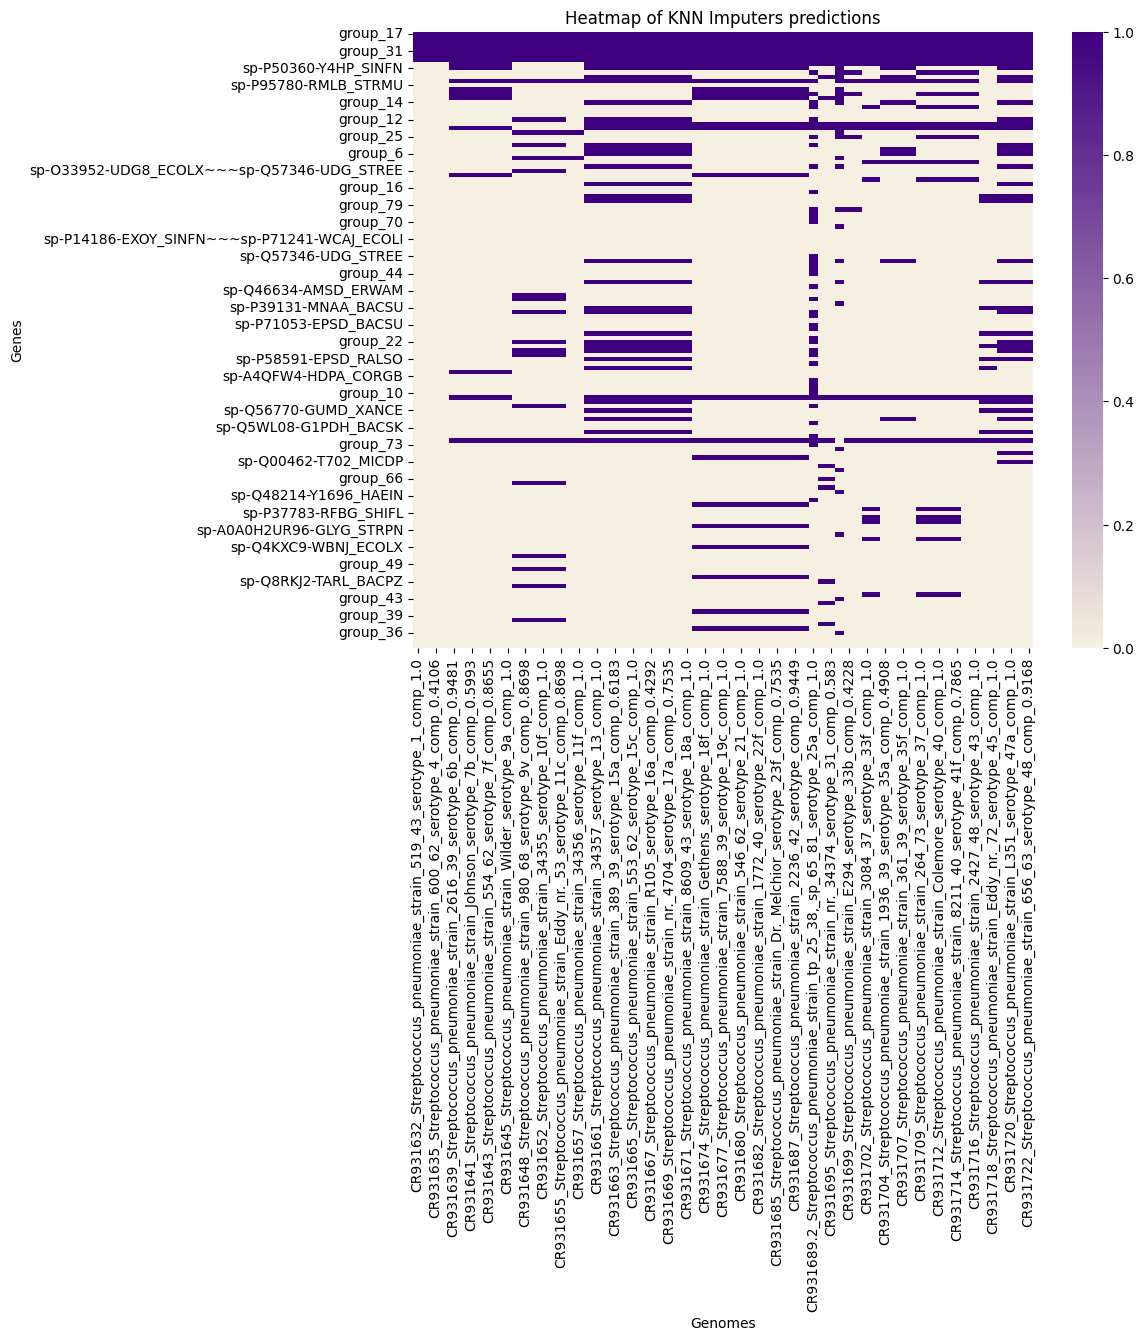

In [197]:
KNN = pd.read_csv('KNN_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))  

sns.heatmap(KNN, cmap=cmap)
 
plt.title('Heatmap of KNN Imputers predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()

## Collaborative Filtering with SVD: Matrix Factorization

1. **Matrix Factorization**:
   - **Purpose**: Decomposes the original data matrix into three matrices—**U**, **Σ**, and **V**.

### Implementation

For implementing this approach, we utilize the **surprise** package, a Python scikit for building and analyzing recommender systems that deal with explicit rating data.
## Using SVD for Collaborative Filtering in Gene Presence-Absence Matrices

### Overview
Collaborative filtering is a powerful technique often used in recommendation systems to predict the preferences of users by analyzing patterns of previous interactions between users and items. In the context of genomic data, we apply this concept to a gene presence-absence matrix.

### Matrix Factorization with SVD

**Singular Value Decomposition (SVD)** decomposes the original data matrix into three smaller matrices. These matrices are essential in uncovering the underlying patterns in the interactions between two distinct entities. Although typically used for users and items in recommendation systems, in our scenario, these entities are represented by genes and genomes.

### Pattern Extraction

The core idea behind using SVD in this context is that much of the genomic data may be redundant. By reducing the dimensionality of the data, we can highlight and utilize the relationships implicit within it. These relationships help in predicting missing values effectively.

### Imputation via Matrix Reconstruction

After decomposing the matrix using SVD, we can reconstruct the original matrix from these decomposed matrices. This process allows us to impute missing values based on the learned patterns, effectively filling in the gaps in our gene presence-absence matrix.

### Implementation Tool

For this approach, we utilize the **surprise** package, a Python library specifically designed for implementing SVD in recommendation systems, adapted here to handle our genes data matrices.


In [198]:
import sys
import surprise
import pandas as pd
from surprise import SVD, Dataset, Reader

print(f"System version: {sys.version}")
print(f"Surprise version: {surprise.__version__}")

System version: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 21:00:12) [Clang 16.0.6 ]
Surprise version: 1.1.3


In [199]:
# Set a random seed for reproducibility, ( I choosed 42 because it's commonly choosen)
SEED = 42
np.random.seed(SEED)



In [200]:
simulated_MAGs = simulated_MAGs_matrix

In [201]:
# Here I reshape the data to the format required by surprise pack.
def transform_to_surprise_format(df):
    """Transform the DataFrame into a list of tuples suitable for Surprise.
       Each tuple consists of (user, item, rating) where 'user' is the index,
       'item' is the column, and 'rating' is the value at df[item][user] -> (gene, genome, presence 1 or absence 0)
    """
    rows, cols = df.shape
    interactions = []
    for i in range(rows):
        for j in range(cols):
            if not pd.isna(df.iloc[i, j]):
                interactions.append((df.index[i], df.columns[j], df.iloc[i, j]))
    return interactions


In [202]:
# Prepare the ground truth dataset for surprise
reader = Reader(rating_scale=(0, 1))
ground_truth_data = Dataset.load_from_df(pd.DataFrame(transform_to_surprise_format(reference_matrix),
                                                      columns=['MAG', 'Gene', 'Value']),
                                         reader)

# Train the SVD algorithm on the ground truth data
trainset = ground_truth_data.build_full_trainset()
svd = SVD(random_state=SEED)
svd.fit(trainset)


In [203]:
# Function to fill missing values with predictions
def fill_missing_values_svd(df, algo):
    """ Fill missing values in the DataFrame using the SVD algorithm """
    filled_df = df.copy()
    for index, row in df.iterrows():
        for col in df.columns:
            if pd.isna(row[col]):
                pred = algo.predict(index, col).est
                # Round predictions to 0 or 1
                pred = 1 if pred >= 0.5 else 0
                filled_df.at[index, col] = pred
    return filled_df


In [204]:
# Impute the missing values in the simulated_MAGs matrix using the trained model
filled_simulated_MAGs = fill_missing_values_svd(simulated_MAGs, svd)


In [205]:
 

filled_simulated_MAGs = filled_simulated_MAGs.T
filled_simulated_MAGs = filled_simulated_MAGs.astype(int)
filled_simulated_MAGs.to_csv('CF_SVD_1.csv', index=True)


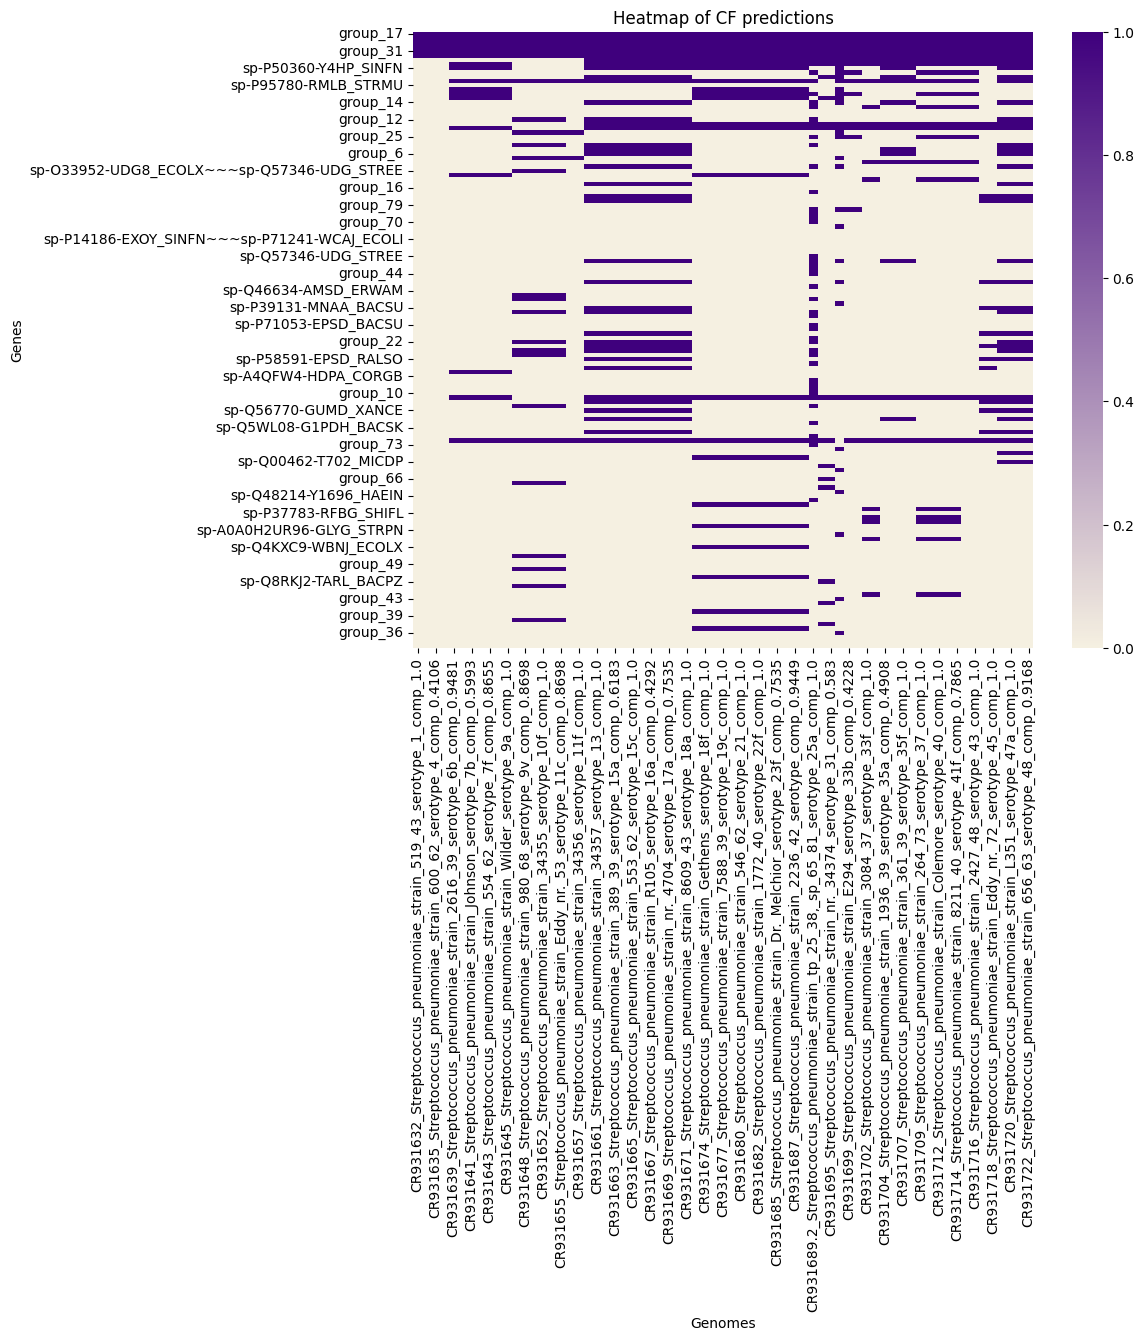

In [206]:
CF = pd.read_csv('CF_SVD_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors) 
plt.figure(figsize=(10, 8))  
sns.heatmap(CF, cmap=cmap)
plt.title('Heatmap of CF predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.show()